In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
gasturbines_data= pd.read_csv('gas_turbines.csv')
gasturbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gasturbines_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
gasturbines_data.shape

(15039, 11)

In [5]:
gasturbines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


No null entries/values in the data.

Checking Missing Values:-

In [6]:
gasturbines_data[gasturbines_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


Visualzing the data on the graph/plots:-

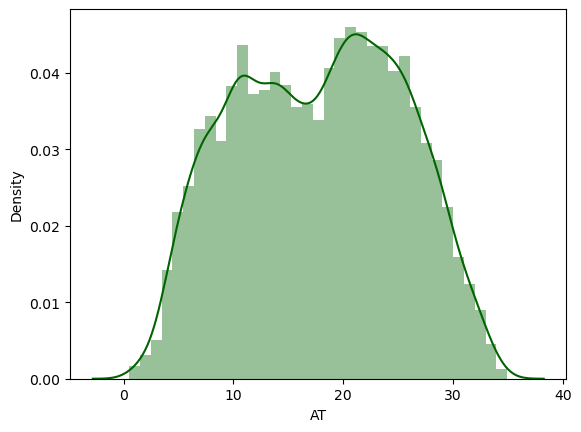

In [7]:
sns.distplot(gasturbines_data['AT'], color = 'darkgreen')
plt.show()

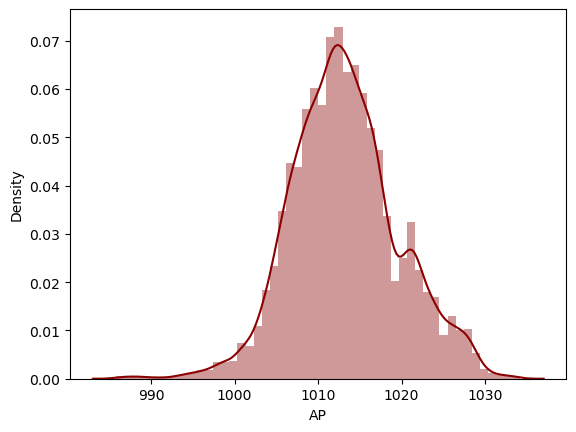

In [8]:
sns.distplot(gasturbines_data['AP'], color = 'darkred')
plt.show()

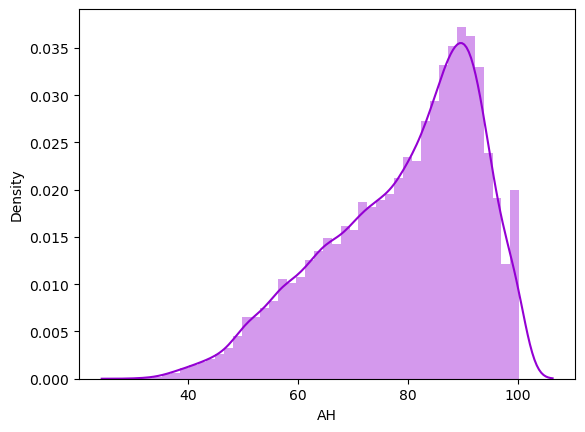

In [9]:
sns.distplot(gasturbines_data['AH'], color = 'darkviolet')
plt.show()

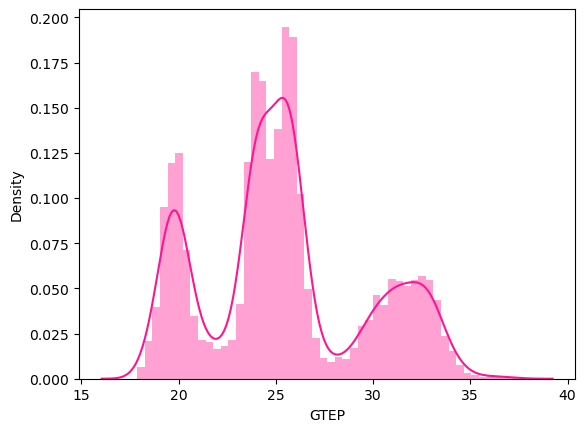

In [10]:
sns.distplot(gasturbines_data['GTEP'], color = 'deeppink')
plt.show()

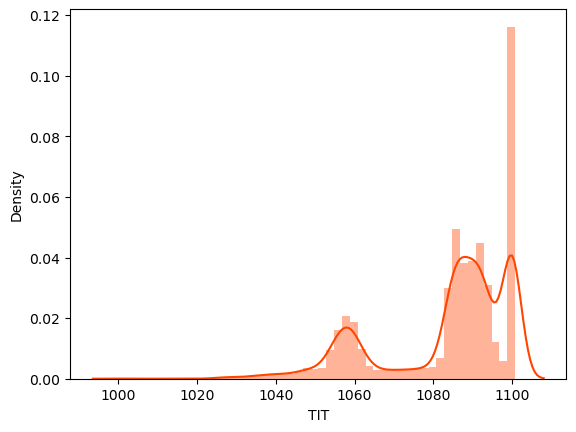

In [11]:
sns.distplot(gasturbines_data['TIT'], color = 'orangered')
plt.show()

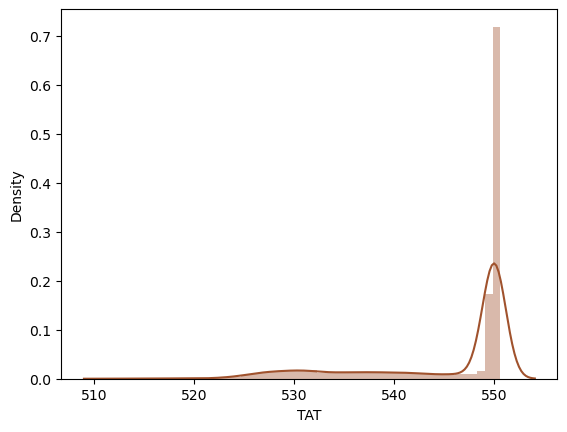

In [12]:
sns.distplot(gasturbines_data['TAT'], color = 'sienna')
plt.show()

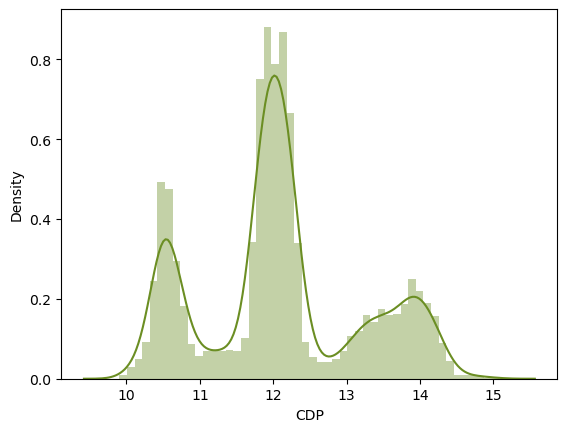

In [13]:
sns.distplot(gasturbines_data['CDP'], color = 'olivedrab')
plt.show()

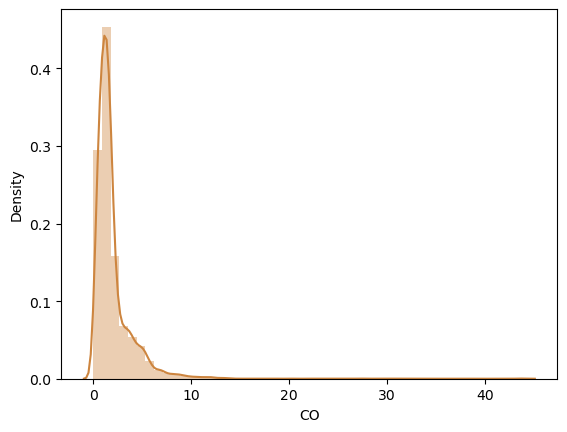

In [14]:
sns.distplot(gasturbines_data['CO'], color = 'peru')
plt.show()

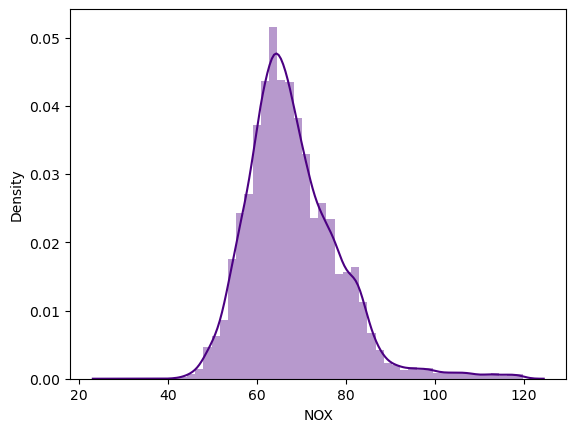

In [15]:
sns.distplot(gasturbines_data['NOX'], color = 'indigo')
plt.show()

Splitting Independent and Dependent Variables:-

In [16]:
y=gasturbines_data["TEY"]

Taking Ambient Variables as Independent Variables:-

In [17]:
 x=gasturbines_data.iloc[:,:3]

In [18]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [19]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

Converting Independent Variables into Numpy Array:-

In [20]:
x1=x.values

In [21]:
x1

array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [22]:
y1=y.values

In [23]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

Building the Model:-
    
Use the Mean Squared Error as the Loss Function:-

In [24]:
model=Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

In [25]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
history=model.fit(x1,y1,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 3s 2ms/step - loss: 268.6460 - val_loss: 261.6502
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: 263.9114 - val_loss: 251.3074
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 259.2883 - val_loss: 234.4529
Epoch 4/250
1008/1008 [==============================] - 1s 1ms/step - loss: 258.8629 - val_loss: 243.7511
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 255.4377 - val_loss: 236.3689
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: 252.1710 - val_loss: 234.0729
Epoch 7/250
1008/1008 [==============================] - 2s 2ms/step - loss: 248.4501 - val_loss: 242.1545
Epoch 8/250
1008/1008 [==============================] - 2s 2ms/step - loss: 246.2665 - val_loss: 246.3779
Epoch 9/250
1008/1008 [==============================] - 2s 1ms/step - loss: 243.5160 - val_loss: 234.7887
Epoch 10/250
1008/1008 [=============

Epoch 77/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.3478 - val_loss: 237.9622
Epoch 78/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.2059 - val_loss: 223.6795
Epoch 79/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.7025 - val_loss: 227.9682
Epoch 80/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.0634 - val_loss: 235.9578
Epoch 81/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.8347 - val_loss: 223.4547
Epoch 82/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.2026 - val_loss: 225.2364
Epoch 83/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.8581 - val_loss: 238.9716
Epoch 84/250
1008/1008 [==============================] - 1s 1ms/step - loss: 227.3179 - val_loss: 223.5922
Epoch 85/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.5377 - val_loss: 227.1073
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 2s 2ms/step - loss: 225.7705 - val_loss: 228.8643
Epoch 153/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.8149 - val_loss: 226.9351
Epoch 154/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.7365 - val_loss: 223.3151
Epoch 155/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.7018 - val_loss: 227.0302
Epoch 156/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.7943 - val_loss: 236.6132
Epoch 157/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.8560 - val_loss: 227.6236
Epoch 158/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.3099 - val_loss: 223.7335
Epoch 159/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.9419 - val_loss: 228.0954
Epoch 160/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.7352 - val_loss: 243.9289
Epoch 161/250
1008/1008 [========

1008/1008 [==============================] - 2s 2ms/step - loss: 226.1398 - val_loss: 224.0509
Epoch 228/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.4520 - val_loss: 223.4005
Epoch 229/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.5473 - val_loss: 230.5889
Epoch 230/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.0670 - val_loss: 230.6766
Epoch 231/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.4212 - val_loss: 223.3768
Epoch 232/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.7160 - val_loss: 223.4009
Epoch 233/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.3250 - val_loss: 223.4995
Epoch 234/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.4238 - val_loss: 223.4592
Epoch 235/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.0660 - val_loss: 223.4098
Epoch 236/250
1008/1008 [========

In [27]:
model.evaluate(x1,y1)

470/470 [==============================] - 0s 859us/step - loss: 223.4429


223.44287109375

In [28]:
pred=model.predict(x1)

470/470 [==============================] - 0s 785us/step


In [29]:
pred

array([[136.59584],
       [136.63832],
       [136.99504],
       ...,
       [135.12518],
       [135.5775 ],
       [136.18457]], dtype=float32)

In [30]:
history.history

{'loss': [268.6459655761719,
  263.911376953125,
  259.288330078125,
  258.86285400390625,
  255.43772888183594,
  252.17100524902344,
  248.45010375976562,
  246.26649475097656,
  243.51602172851562,
  241.7810821533203,
  240.36050415039062,
  240.4830322265625,
  236.8412628173828,
  235.22653198242188,
  233.77232360839844,
  232.25515747070312,
  231.66192626953125,
  232.25315856933594,
  230.29498291015625,
  229.0110626220703,
  228.84222412109375,
  228.3508758544922,
  228.50848388671875,
  228.5123748779297,
  227.44277954101562,
  227.70042419433594,
  227.27040100097656,
  226.84194946289062,
  226.70652770996094,
  226.52500915527344,
  227.8100128173828,
  227.02186584472656,
  227.3914794921875,
  226.6358184814453,
  227.22506713867188,
  226.9465789794922,
  226.83120727539062,
  225.93919372558594,
  226.1358184814453,
  226.9192352294922,
  226.50595092773438,
  226.96267700195312,
  226.7373504638672,
  227.08981323242188,
  226.6983642578125,
  226.46473693847656,

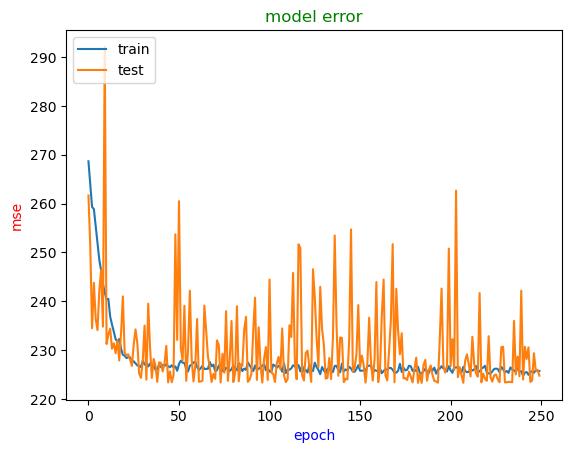

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error', color = 'green')
plt.ylabel('mse', color=  'red')
plt.xlabel('epoch', color = 'blue')
plt.legend(['train','test'],loc='upper left')
plt.show()

Trying Another Model:-

In [32]:
model1=Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

In [33]:
model1.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
history=model.fit(x1,y1,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.1586 - val_loss: 230.7283
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.6142 - val_loss: 237.1430
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.1351 - val_loss: 224.9201
Epoch 4/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.6371 - val_loss: 227.0292
Epoch 5/250
1008/1008 [==============================] - 2s 1ms/step - loss: 225.1455 - val_loss: 234.4193
Epoch 6/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.4357 - val_loss: 242.0842
Epoch 7/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.3711 - val_loss: 223.8713
Epoch 8/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.0426 - val_loss: 225.2055
Epoch 9/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.7718 - val_loss: 250.7835
Epoch 10/250
1008/1008 [=============

Epoch 77/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.5054 - val_loss: 225.3866
Epoch 78/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.3940 - val_loss: 228.3193
Epoch 79/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.2445 - val_loss: 223.6241
Epoch 80/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.6297 - val_loss: 223.7490
Epoch 81/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.4975 - val_loss: 249.2471
Epoch 82/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.5726 - val_loss: 228.2713
Epoch 83/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.4838 - val_loss: 223.3246
Epoch 84/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.4189 - val_loss: 224.6685
Epoch 85/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.2577 - val_loss: 226.8754
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 1s 1ms/step - loss: 224.5721 - val_loss: 223.3541
Epoch 153/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.8555 - val_loss: 227.3919
Epoch 154/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.1687 - val_loss: 224.0161
Epoch 155/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.4265 - val_loss: 223.3634
Epoch 156/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.2388 - val_loss: 231.4113
Epoch 157/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.1308 - val_loss: 224.5119
Epoch 158/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.9940 - val_loss: 237.2584
Epoch 159/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.6506 - val_loss: 244.1137
Epoch 160/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.8981 - val_loss: 225.1078
Epoch 161/250
1008/1008 [========

1008/1008 [==============================] - 2s 2ms/step - loss: 224.7332 - val_loss: 235.7496
Epoch 228/250
1008/1008 [==============================] - 2s 1ms/step - loss: 224.8844 - val_loss: 233.4742
Epoch 229/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.8828 - val_loss: 223.2763
Epoch 230/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.3939 - val_loss: 232.6987
Epoch 231/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.0663 - val_loss: 225.0682
Epoch 232/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.5307 - val_loss: 239.8999
Epoch 233/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.0385 - val_loss: 223.2918
Epoch 234/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.4971 - val_loss: 234.5267
Epoch 235/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.2264 - val_loss: 225.4863
Epoch 236/250
1008/1008 [========

In [35]:
model1.evaluate(x1,y1)

470/470 [==============================] - 0s 802us/step - loss: 263451.7188


263451.71875

This model gives a significantly worse error.

Adding the additional hidden layer to the model:-

In [36]:
model2=Sequential()
model2.add(Dense(3,activation='relu'))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(3,activation='relu'))
model2.add(Dense(1,activation='linear'))

In [37]:
model2.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
history=model2.fit(x1,y1,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: 18534.9590 - val_loss: 17381.1426
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: 18157.0410 - val_loss: 17119.6328
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 17889.9355 - val_loss: 16860.3340
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 17625.0918 - val_loss: 16603.2969
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 17362.3633 - val_loss: 16348.3037
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: 17101.8281 - val_loss: 16095.5117
Epoch 7/250
1008/1008 [==============================] - 2s 2ms/step - loss: 16843.3516 - val_loss: 15844.6875
Epoch 8/250
1008/1008 [==============================] - 2s 2ms/step - loss: 16586.8242 - val_loss: 15595.8574
Epoch 9/250
1008/1008 [==============================] - 2s 1ms/step - loss: 16332.4238 - val_loss: 15349.1973
E

Epoch 75/250
1008/1008 [==============================] - 1s 1ms/step - loss: 3988.0186 - val_loss: 3509.9810
Epoch 76/250
1008/1008 [==============================] - 1s 1ms/step - loss: 3868.1299 - val_loss: 3397.7268
Epoch 77/250
1008/1008 [==============================] - 1s 1ms/step - loss: 3750.3247 - val_loss: 3287.5676
Epoch 78/250
1008/1008 [==============================] - 1s 1ms/step - loss: 3634.6045 - val_loss: 3179.4604
Epoch 79/250
1008/1008 [==============================] - 1s 1ms/step - loss: 3520.7944 - val_loss: 3073.1643
Epoch 80/250
1008/1008 [==============================] - 1s 1ms/step - loss: 3408.9397 - val_loss: 2968.9319
Epoch 81/250
1008/1008 [==============================] - 1s 1ms/step - loss: 3299.0610 - val_loss: 2866.6851
Epoch 82/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3191.2288 - val_loss: 2766.4194
Epoch 83/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3085.3804 - val_loss: 2668.1274
Epoch 84/2

Epoch 150/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.1537 - val_loss: 241.1933
Epoch 151/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.1163 - val_loss: 241.5139
Epoch 152/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0929 - val_loss: 241.7715
Epoch 153/250
1008/1008 [==============================] - 4s 4ms/step - loss: 256.0756 - val_loss: 242.0452
Epoch 154/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0634 - val_loss: 242.2364
Epoch 155/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0567 - val_loss: 242.3636
Epoch 156/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0504 - val_loss: 242.5163
Epoch 157/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0474 - val_loss: 242.6188
Epoch 158/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0441 - val_loss: 242.7481
Epoch 159/250
1008/

1008/1008 [==============================] - 2s 2ms/step - loss: 256.0381 - val_loss: 243.1241
Epoch 226/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0397 - val_loss: 243.1444
Epoch 227/250
1008/1008 [==============================] - 1s 1ms/step - loss: 256.0395 - val_loss: 243.1024
Epoch 228/250
1008/1008 [==============================] - 1s 1ms/step - loss: 256.0385 - val_loss: 243.1035
Epoch 229/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0385 - val_loss: 243.1439
Epoch 230/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0403 - val_loss: 243.1591
Epoch 231/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0400 - val_loss: 243.1676
Epoch 232/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0394 - val_loss: 243.1424
Epoch 233/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0383 - val_loss: 243.1698
Epoch 234/250
1008/1008 [========

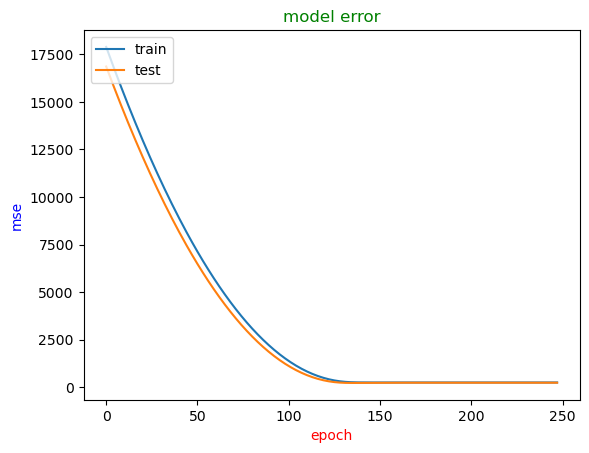

In [39]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.title('model error', color = 'green')
plt.ylabel('mse', color = 'blue')
plt.xlabel('epoch', color = 'red')
plt.legend(['train','test'],loc='upper left')
plt.show()

Conclusion:-
    
By using TensorFlow, Prediction of Turbine Energy Yield (TEY) we can see error is going to decrease it means we got better model.